<a href="https://colab.research.google.com/github/migvanderlei/rna-2-2/blob/main/PP2_2_1_Conhecendo_o_Conjunto_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  

    3.1 O que é cada exemplo na base de dados?  
    3.2 Em que ano ela foi obtida?  
    3.3 Quem foram os responsáveis pela criação desta base de dados?  

In [ ]:
import pandas as pd

Cada exemplo traz dados morfológicos de tipo de solo e cartográficos (como proximidade a corpos d'água ou estradas), para àreas de 30x30 metros em um Parque Nacional no norte do Colorado, EUA. Cada exemplo é classificado em seis tipos diferentes de cobertura vegetal.

1998

Jock A. Blackard; Dr. Denis J. Dean; Dr. Charles W. Anderson

### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

In [ ]:
dataset = pd.read_csv("covtype.csv")
dataset.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
dataset.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581002,2419,168,25,108,33,124,230,240,126,812,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581003,2415,161,25,95,29,120,236,237,116,815,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581004,2410,158,24,90,24,120,238,236,115,819,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
print(f"A base possui {len(dataset)} exemplos")

A base possui 581012 exemplos


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Há apenas uma linha com diversos valores de `Soil_Type*` faltantes, assim como o atributo alvo `Cover_Type`.

In [ ]:
dataset[pd.isna(dataset.Cover_Type)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [ ]:
dataset.dropna(inplace=True)

Os atributos do tipo `Soil_Type` representam uma variável qualitativa, atribuindo a cada amostra um dentre os 40 tipos de solo considerados no artigo que originalmente descreve o dataset.

Os atributos `Soil_Type` foram representados em **One Hot Encoding**, o que gerou uma série de atributos deste tipo, numerados de 1 a 40.

### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

In [ ]:
def reverse_one_hot(column_name, columns, data):
  series = []
  for idx, row in data.iterrows():
    for column in columns:
      if row[column] != 0:
        series.append(int(column.replace(column_name, "")))
  return pd.Series(series)

In [ ]:
# Soil_Type
columns_soil_type = [f"Soil_Type{i}" for i in range(1, 41)]
soil_type = reverse_one_hot("Soil_Type", columns_soil_type, dataset)
plot_dataset = dataset.drop(columns_soil_type, axis=1)
plot_dataset["Soil_Type"] = soil_type

# Wilderness_Area
columns_wilderness_area = [f"Wilderness_Area{i}" for i in range(1, 5)]
wilderness_area = reverse_one_hot("Wilderness_Area", columns_wilderness_area, dataset)
plot_dataset = plot_dataset.drop(columns_wilderness_area, axis=1)
plot_dataset["Wilderness_Area"] = wilderness_area

# plot_dataset.drop(["Cover_Type"], axis=1, inplace=True)

In [ ]:
len(plot_dataset.columns)

13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f46640a90>,
      dtype=object)

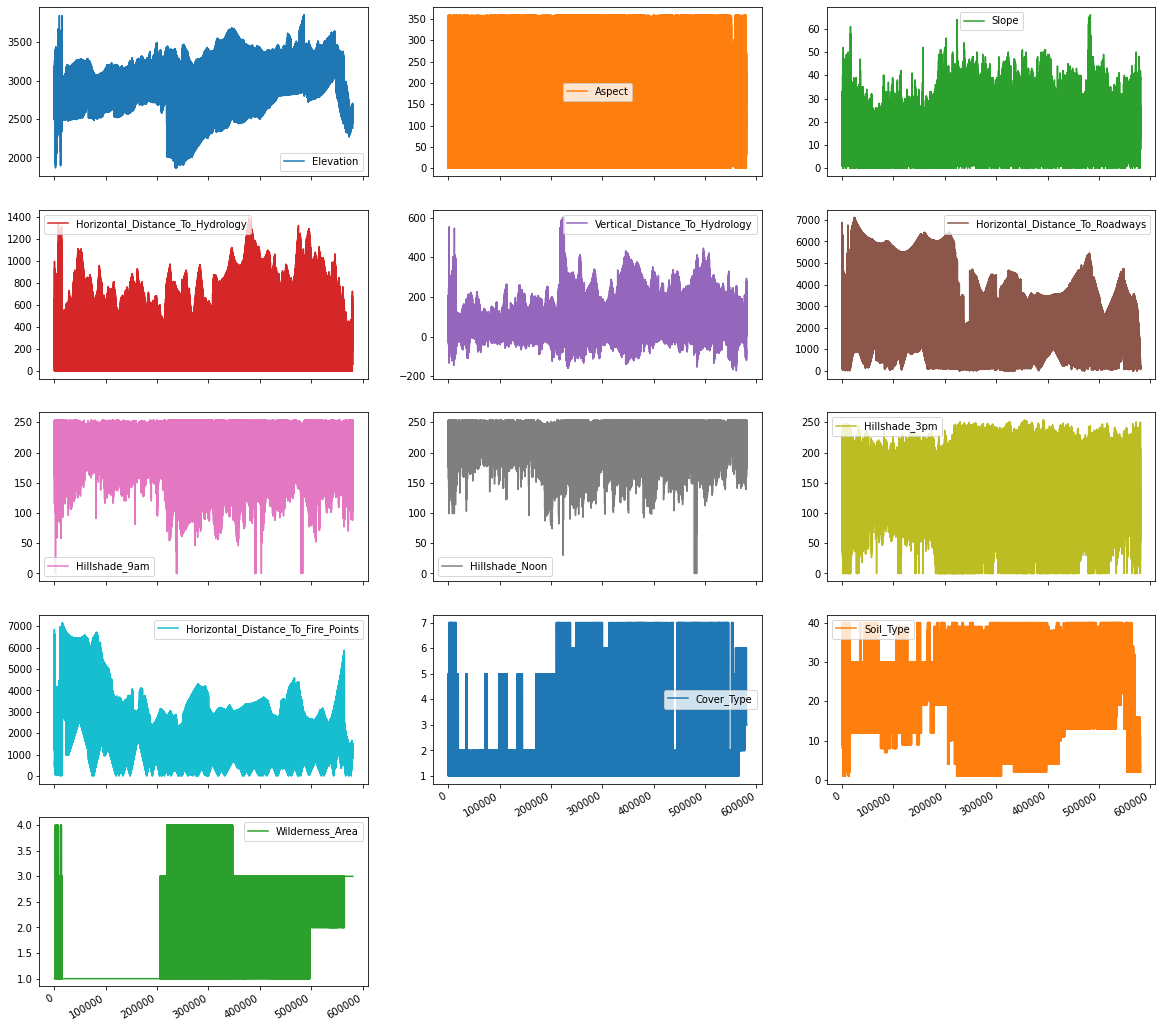

In [ ]:
plot_dataset.plot(subplots=True, layout=(5,3), figsize=(20, 20))

**Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?**

Tarefa de Classificação.

**Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)**

* Acurácia
* Precisão
* Revocação
* F-1 Score
* Curva ROC


**Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe**

F-1 Score, por balancear Precisão e Revocação em uma média harmônica.